# 02 - Exploratory Data Analysis (Drivers & Visuals)

In [118]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

filepath_train = r"../data/coral_students.csv"
df = pd.read_csv(filepath_train)

df.head()

,Sample_ID,Site_ID,ClimSST,Temperature_Kelvin,Temperature_Mean,Temperature_Minimum,Temperature_Maximum,Temperature_Kelvin_Standard_Deviation,Windspeed,SSTA,...,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Depth_m,Distance_to_Shore,Exposure,Turbidity,Cyclone_Frequency,Percent_Bleached
0,10274495.0,12082.0,301.65,303.50,299.79,293.35,305.54,2.52,2.0,0.49,...,1.27,0.74,6.05,0.22,8.3,8311.0,exposed,0.0586,56.583448,4.76
1,10274496.0,12083.0,299.31,300.84,299.75,293.68,305.44,2.54,6.0,-0.42,...,1.20,0.93,10.39,0.27,14.9,10747.0,exposed,0.0543,52.842523,21.88
2,10274497.0,12084.0,300.56,302.65,299.81,293.35,305.47,2.50,5.0,0.36,...,2.71,0.83,7.18,0.23,10.7,9396.0,exposed,0.0571,56.583448,19.66
3,10274498.0,12085.0,299.75,302.43,299.81,293.35,305.47,2.50,7.0,0.54,...,3.60,0.83,7.18,0.23,7.6,9408.0,exposed,0.0571,56.583448,28.03
4,10274499.0,12086.0,297.65,295.69,299.81,293.35,305.47,2.50,7.0,-0.91,...,0.00,0.83,7.18,0.23,10.0,9362.0,exposed,0.0571,56.583448,2.75


In [119]:
df.columns

Index(['Sample_ID', 'Site_ID', 'ClimSST', 'Temperature_Kelvin',
       'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum',
       'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA',
       'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
       'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation',
       'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
       'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA',
       'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
       'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax',
       'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation',
       'TSA_DHWMax', 'TSA_DHWMean', 'Depth_m', 'Distance_to_Shore', 'Exposure',
       'Turbidity', 'Cyclone_Frequency', 'Percent_Bleached'],
      dtype='object')

our columns do comply with the documentation, so we'll use the df_column_descriptions as our main domain knowledge reference

In [120]:
print(df.loc[df["Percent_Bleached"] < 0, "Percent_Bleached"])
df.loc[df["Percent_Bleached"] < 0, "Percent_Bleached"].count()

52      -9.800000
300     -2.700000
587    -29.890000
773    -10.000000
827     -6.350000
870    -83.330000
885    -90.410000
1119    -1.000000
1377   -42.900000
1451   -20.000000
1452   -31.000000
1496   -68.421053
1569   -29.600000
1720   -27.300000
1755   -25.000000
2029   -39.600000
2100   -86.000000
2325    -2.802198
2456   -25.371798
2475   -20.353836
2836    -0.694444
3101    -6.352273
3154    -1.349432
3291   -13.280000
3394    -4.170000
3444   -52.170000
3596    -9.200000
3660   -20.000000
3714   -25.000000
3747   -10.000000
3755   -58.300000
3982   -25.000000
4043   -31.292874
4112    -1.841949
Name: Percent_Bleached, dtype: float64


34

we have discovered that there are negative values in the target variable, but it does not make sense to have negative values in the 'Percent_Bleached' since the biological standpoint -> our solution is to drop them since there are only 34 rows

In [121]:
df.drop(df[df["Percent_Bleached"] < 0].index, inplace=True)

In [122]:
print(df.loc[df["Percent_Bleached"] < 0, "Percent_Bleached"])
df.loc[df["Percent_Bleached"] < 0, "Percent_Bleached"].count()

Series([], Name: Percent_Bleached, dtype: float64)


0

In [123]:
target = df['Percent_Bleached']

In [124]:
target.describe()

count    4411.000000
mean       24.483928
std        33.864834
min        -0.000000
25%         1.719114
50%         9.000000
75%        34.461379
max       199.384383
Name: Percent_Bleached, dtype: float64

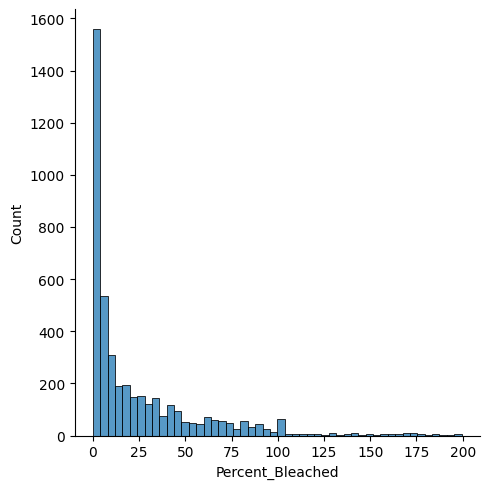

In [125]:
sns.displot(target)

In [126]:
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())

Skewness: 2.123239
Kurtosis: 5.171980


the data is right skewed and most of the data are clustered at the lower values, leptokurtic distribution which 
means we have either extreme outliers or quite complex relationship that we need to explore 

Still object dtype after coercion (should be empty): []
Exposure: 4412 non-numeric (now NaN). Examples (first 10): ['nan']


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)


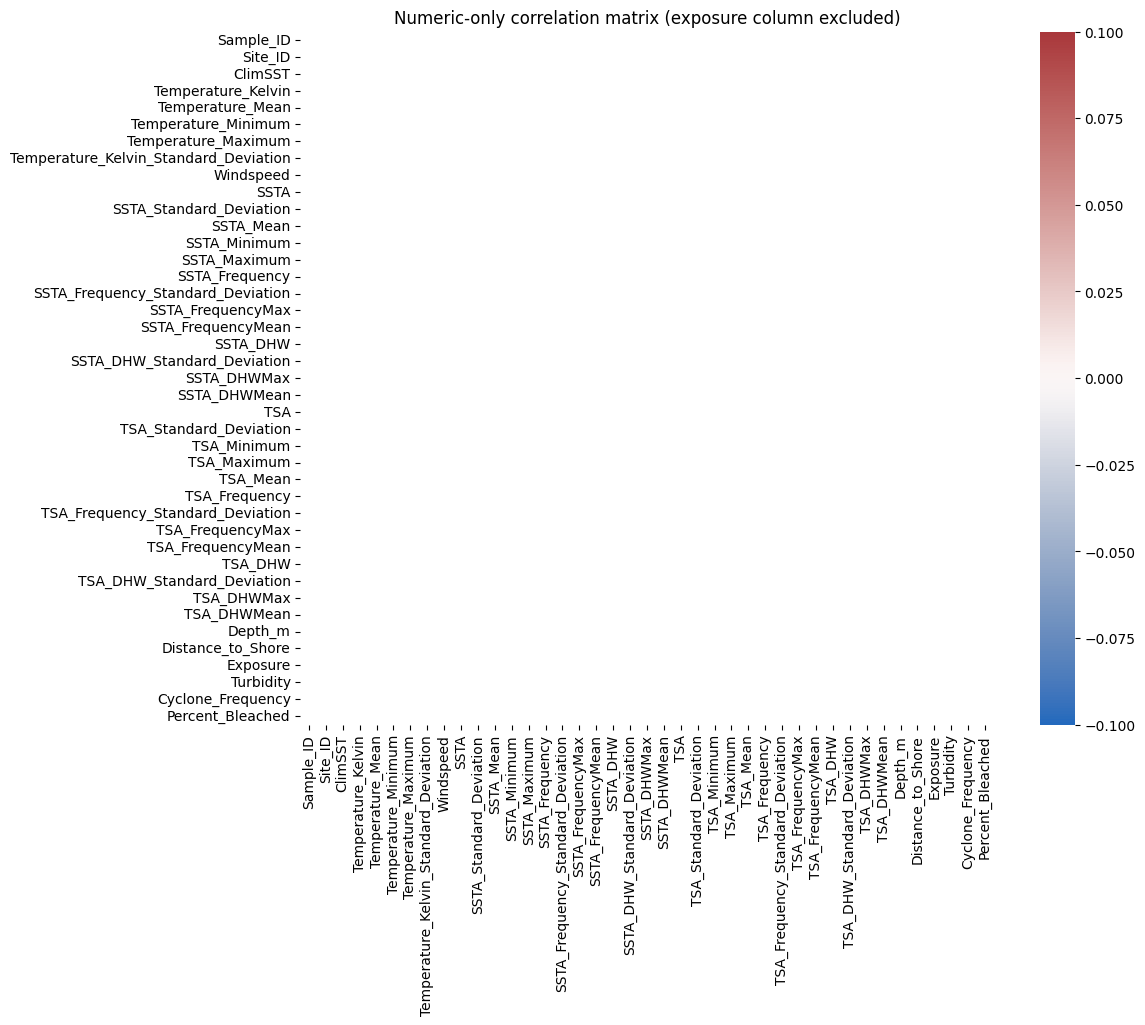

In [127]:
exposure_col = "exposure"   # or "exposed" or "Exposure" — set to your actual column name

# 1) list object columns to convert, excluding the exposure column
obj_cols = df.select_dtypes(include=["object"]).columns.tolist()
cols_to_try = [c for c in obj_cols if c != exposure_col]

# 2) attempt to clean and coerce each column to numeric (non-convertible -> NaN)
for c in cols_to_try:
    # optional lightweight cleaning: strip whitespace, remove thousands separators, percent signs, etc.
    # adjust .str.replace patterns to match the kinds of dirty strings you have
    cleaned = df[c].astype(str).str.strip().str.replace(",", "", regex=False).str.replace("%", "", regex=False)
    # try to convert; non-convertible entries become NaN
    df[c] = pd.to_numeric(cleaned, errors="coerce")

# 3) inspect which columns still have non-numeric examples (if any)
still_obj = df[cols_to_try].columns[df[cols_to_try].apply(lambda s: s.dtype == "object")]
print("Still object dtype after coercion (should be empty):", list(still_obj))

# show columns that produced NaNs from coercion and some examples
for c in cols_to_try:
    n_nonconvertible = df[c].isna().sum()
    if n_nonconvertible:
        print(f"{c}: {n_nonconvertible} non-numeric (now NaN). Examples (first 10):",
              df.loc[df[c].isna(), c].head(10).astype(str).unique()[:10])

# 4) build numeric-only DataFrame for correlation (keep original exposure column untouched)
numeric_df = df.select_dtypes(include=[np.number]).copy()

# Optional: if you want to keep the exposure info as a numeric dummy, create it separately
# only do this if exposure is a binary-like category and you understand the meaning
# df["exposure_flag"] = df[exposure_col].map({"exposed": 1, "not_exposed": 0})  # example mapping
# numeric_df = pd.concat([numeric_df, df["exposure_flag"]], axis=1)

# 5) drop columns with very few non-NaN values (optional) or fillna as you prefer
# numeric_df = numeric_df.dropna(axis=1, thresh=int(0.5 * len(numeric_df)))  # drop columns with >50% NaN
numeric_df = numeric_df.dropna()  # or use fillna(method="ffill") / numeric_df.fillna(numeric_df.median())

# 6) correlation + heatmap
corrmat = numeric_df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt=".2f", cmap="vlag")
plt.title("Numeric-only correlation matrix (exposure column excluded)")
plt.show()